<a href="https://colab.research.google.com/github/JJIJJINO/Autocoin/blob/main/AI%EC%8B%9C%EA%B3%84%EC%97%B4%EA%B3%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pyupbit

     |████████████████████████████████| 103 kB 8.6 MB/s 


In [2]:
import pyupbit

In [40]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df


,open,high,low,close,volume,value
2021-08-17 13:00:00,54327000.0,54500000.0,54076000.0,54200000.0,281.919649,1.529803e+10
2021-08-17 14:00:00,54202000.0,54280000.0,53750000.0,53778000.0,298.004413,1.610308e+10
2021-08-17 15:00:00,53778000.0,53939000.0,53599000.0,53659000.0,341.383953,1.835380e+10
2021-08-17 16:00:00,53659000.0,53871000.0,53551000.0,53800000.0,295.412436,1.585885e+10
2021-08-17 17:00:00,53792000.0,54117000.0,53704000.0,53926000.0,260.362938,1.404081e+10
...,...,...,...,...,...,...
2021-08-25 16:00:00,56574000.0,56819000.0,56434000.0,56635000.0,725.264325,4.107490e+10
2021-08-25 17:00:00,56635000.0,56741000.0,55142000.0,55194000.0,1863.297066,1.042972e+11
2021-08-25 18:00:00,55188000.0,55700000.0,55100000.0,55395000.0,972.323927,5.380647e+10
2021-08-25 19:00:00,55395000.0,55650000.0,55285000.0,55525000.0,397.722435,2.207675e+10


In [41]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-08-17 13:00:00,54200000.0
1,2021-08-17 14:00:00,53778000.0
2,2021-08-17 15:00:00,53659000.0
3,2021-08-17 16:00:00,53800000.0
4,2021-08-17 17:00:00,53926000.0
...,...,...
195,2021-08-25 16:00:00,56635000.0
196,2021-08-25 17:00:00,55194000.0
197,2021-08-25 18:00:00,55395000.0
198,2021-08-25 19:00:00,55525000.0


In [42]:
#prophet 불러옴
from fbprophet import Prophet

In [43]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [44]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=48, freq='H')
forecast = model.predict(future)

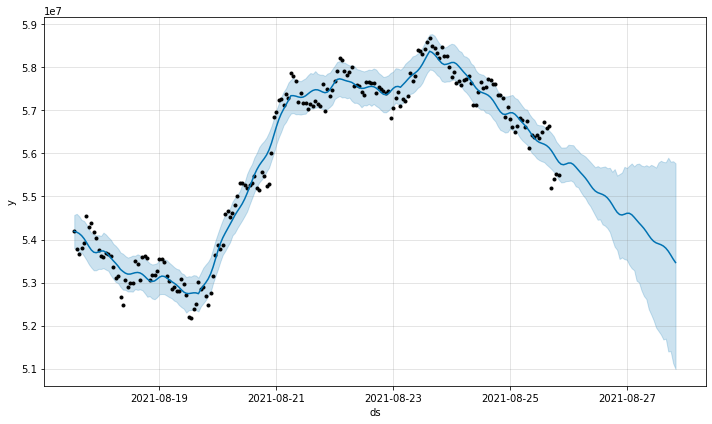

In [45]:
#그래프1
fig1 = model.plot(forecast)

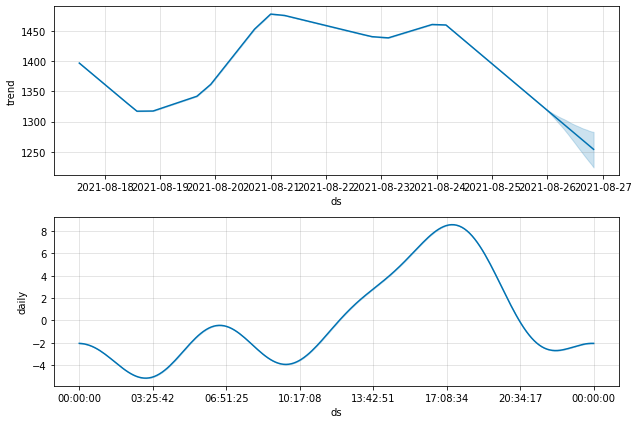

In [21]:
#그래프2
fig2 = model.plot_components(forecast)

In [22]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-XRP")
nowValue

1330.0

In [23]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

1285.9897562899619

In [24]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  1330.0
종가의 가격:  1285.9897562899619


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-17 13:00:00,1396.976931,1371.676040,1424.091710,1396.976931,1396.976931,1.675174,1.675174,1.675174,1.675174,1.675174,1.675174,0.0,0.0,0.0,1398.652105
1,2021-08-17 14:00:00,1393.771257,1373.508394,1421.110397,1393.771257,1393.771257,3.254034,3.254034,3.254034,3.254034,3.254034,3.254034,0.0,0.0,0.0,1397.025292
2,2021-08-17 15:00:00,1390.565584,1372.818747,1420.090870,1390.565584,1390.565584,4.937280,4.937280,4.937280,4.937280,4.937280,4.937280,0.0,0.0,0.0,1395.502864
3,2021-08-17 16:00:00,1387.359910,1369.249785,1419.366300,1387.359910,1387.359910,6.910874,6.910874,6.910874,6.910874,6.910874,6.910874,0.0,0.0,0.0,1394.270784
4,2021-08-17 17:00:00,1384.154236,1368.312323,1418.305033,1384.154236,1384.154236,8.405778,8.405778,8.405778,8.405778,8.405778,8.405778,0.0,0.0,0.0,1392.560013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-08-26 16:00:00,1267.059453,1240.109572,1306.308720,1243.703404,1287.915514,6.910874,6.910874,6.910874,6.910874,6.910874,6.910874,0.0,0.0,0.0,1273.970327
220,2021-08-26 17:00:00,1263.843865,1232.493250,1309.234928,1238.853438,1286.764160,8.405778,8.405778,8.405778,8.405778,8.405778,8.405778,0.0,0.0,0.0,1272.249643
221,2021-08-26 18:00:00,1260.628277,1230.464694,1306.916116,1234.019505,1285.032657,8.164028,8.164028,8.164028,8.164028,8.164028,8.164028,0.0,0.0,0.0,1268.792305
222,2021-08-26 19:00:00,1257.412689,1222.670241,1301.723961,1229.422504,1283.870591,5.665764,5.665764,5.665764,5.665764,5.665764,5.665764,0.0,0.0,0.0,1263.078453
